In [1]:
import mne
import scipy.io

# Load the .mat file containing electrode locations
mat_data = scipy.io.loadmat('5f_data/HaLTSubjectE1603046StLRHandLegTongue.mat')

o_data = mat_data['o']

# Access data within 'o' (assuming 'o' is the main data structure you're interested in)
id_data = o_data['id']
tag_data = o_data['tag']
samp_freq_data = o_data['sampFreq']
nS_data = o_data['nS']
marker_data = o_data['marker']
data_data = o_data['data']
chnames_data = o_data['chnames']
binsuV_data = o_data['binsuV']
eeg_data = data_data[0][0]
chnames = chnames_data[0][0]
channel_name_arrays=chnames.tolist()
channel_names = [name[0] for name in channel_name_arrays]
channel_names = [name[0] for name in channel_names]

In [2]:
import numpy as np
markers = [marker[0] for marker in marker_data][0]
unique_values = np.unique(markers)
#//count how many times each unique value appears in markers
unique_value_counts = np.array([(markers == value).sum() for value in unique_values])
unique_value_counts

array([422444,  33209,  32395,  32186,  30965,  33204,  30948,  48013,
          207,   1029])

In [3]:
import pandas as pd

# Your data array
data_array = markers

# Initialize variables to keep track of the current value and its count
current_value = None
current_count = 0
value_counts = []
current_pos = 0

# Iterate through the data array
for pos, value in enumerate(data_array.flatten()):
    if value == current_value:
        # Increment the count for consecutive occurrences
        current_count += 1
    else:
        # If a new value is encountered, add the previous value and count to the list
        if current_value is not None:
            value_counts.append((current_value, current_count,current_pos))
        # Reset count for the new value
        current_value = value
        current_pos = pos
        current_count = 1
        

# Add the last value and its count to the list
if current_value is not None:
    value_counts.append((current_value, current_count, current_pos))

# Create a DataFrame to present the consecutive counts in a table format
counts_table = pd.DataFrame(value_counts, columns=['Value', 'Consecutive Count','onset'])

In [4]:
counts_table[counts_table["Value"].isin ([1,2,0])]['Value']
positions_in_samples = counts_table[counts_table["Value"].isin ([1,2,0])]['onset']
events = counts_table[counts_table["Value"].isin ([1,2,0])]['Value']
event_arr = np.array([positions_in_samples, np.zeros(len(positions_in_samples)), events]).T.astype(int)

index_first_one = np.argmax(event_arr[:, 2] == 1)
index_first_one
event_arr= event_arr[index_first_one:]

In [5]:
freq=samp_freq_data[0][0][0][0]
info = mne.create_info(channel_names, freq)
raw = mne.io.RawArray(eeg_data.T, info)
montage =  mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)


Creating RawArray with float64 data, n_channels=22, n_times=664600
    Range : 0 ... 664599 =      0.000 ...  3322.995 secs
Ready.


/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_819/4007071457.py:5: RuntimeWarning: Not setting positions of 21 misc channels found in montage:
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


<RawArray | 22 x 664600 (3323.0 s), ~111.6 MB, data loaded>

In [6]:
for ch in raw.ch_names:
    raw.set_channel_types({ch: 'eeg'})

channels_to_drop = ['A1', 'A2','X5']
#referenced
raw.set_channel_types({'A2': 'eog'})
raw.set_channel_types({'A1': 'eog'})
raw.set_eeg_reference(ref_channels=['A1', 'A2'])
raw.notch_filter([60], method='fir', fir_design='firwin')
raw.filter(l_freq=0.5, h_freq=50, method='fir', fir_design='firwin')

raw = raw.pick_channels(ch_names=[ch for ch in raw.ch_names if ch not in channels_to_drop])

montage =  mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

#mne resample  
raw_resampled = raw.copy().resample(250.0, npad='auto')

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1321 samples (6.605 s)



/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_819/2827093383.py:2: RuntimeWarning: The unit for channel(s) Fp1 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_819/2827093383.py:2: RuntimeWarning: The unit for channel(s) Fp2 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_819/2827093383.py:2: RuntimeWarning: The unit for channel(s) F3 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_819/2827093383.py:2: RuntimeWarning: The unit for channel(s) F4 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_819/2827093383.py:2: RuntimeWarning: The unit for channel(s) C3 has changed from NA to V.
  raw.set_channel_types({ch: 'eeg'})
/var/folders/36/kdqqc2hj0vj0qz_r5mtckf700000gn/T/ipykernel_819/28270

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1321 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


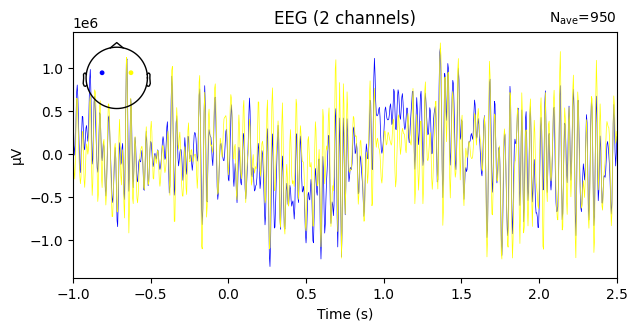

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


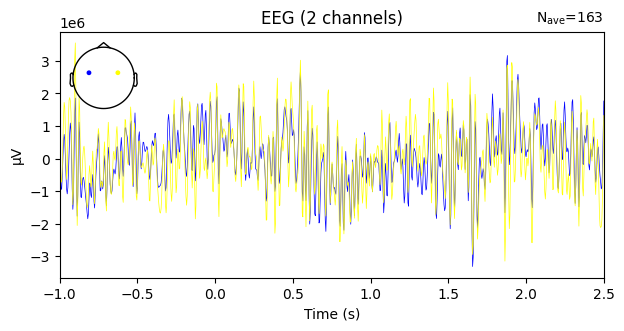

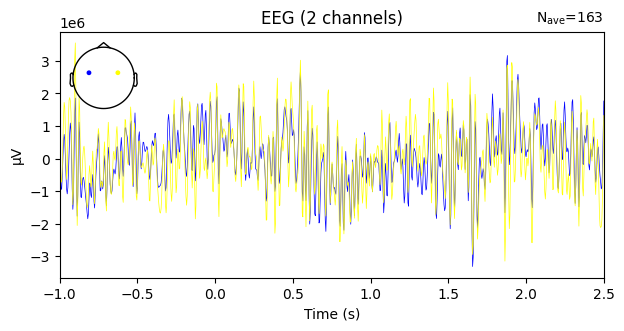

In [84]:
epochs["0"].average(picks=['C3','C4']).plot(ylim=[-1,1])
epochs["1"].average(picks=['C3','C4']).plot(ylim=[-1,1])

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 11.1s.


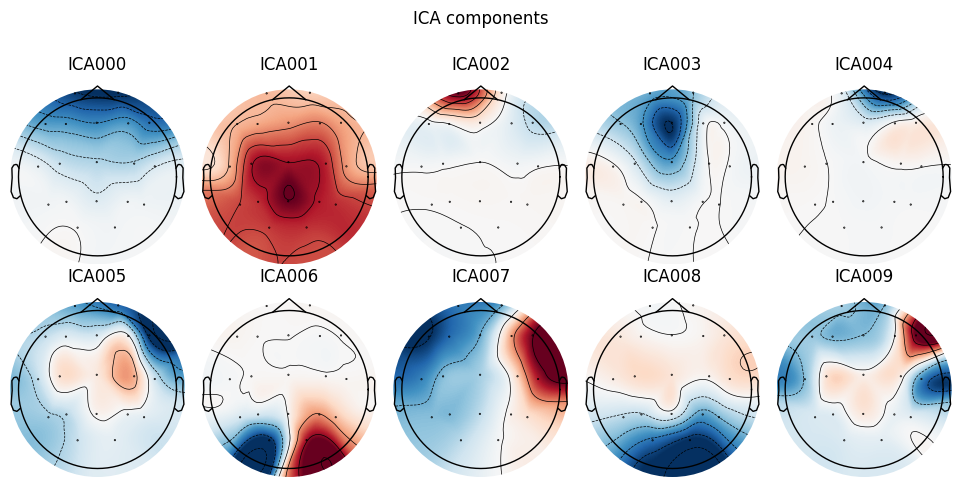

Using EOG channels: Fp1, Fp2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 

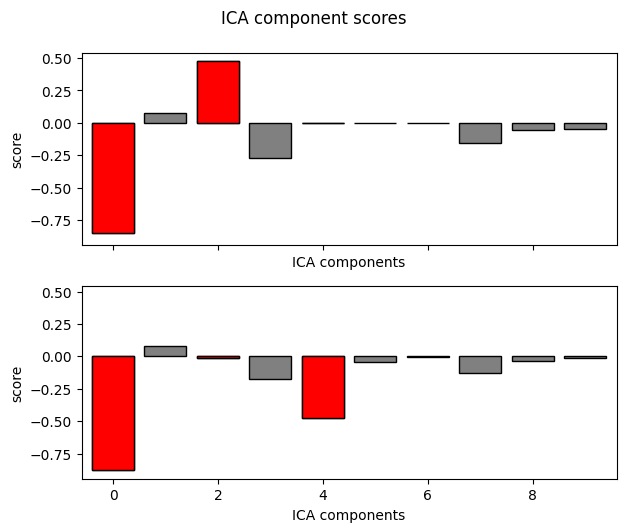

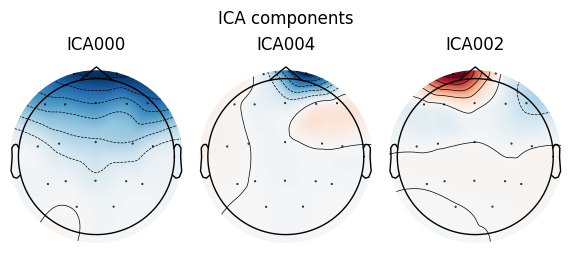

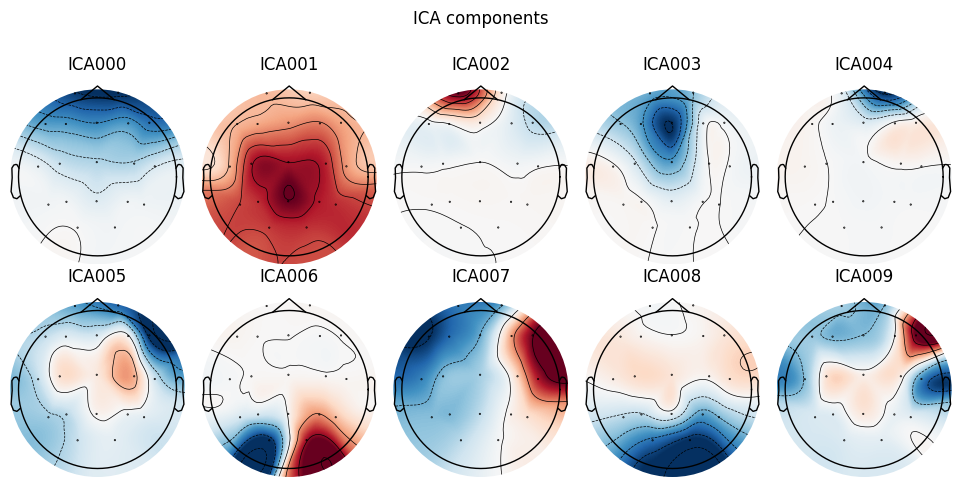

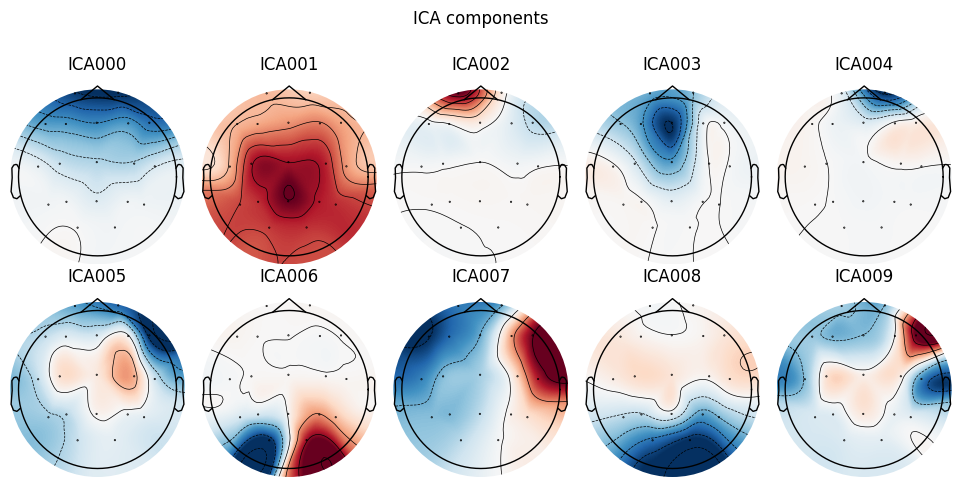

In [20]:
#eogs=mnepp.find_eog_events(raw)
import mne.preprocessing as mnepp

ica_general = mnepp.ICA(10,random_state=97)
ica_general.fit(raw_resampled)
ica_general.plot_components()

eog_inds, scores = ica_general.find_bads_eog(raw_resampled, ch_name=['Fp1','Fp2'],threshold=0.9)
print(eog_inds)
ica_general.plot_scores(scores, exclude=eog_inds)
ica_general.plot_components(picks=eog_inds)
ica_general.plot_components()
 
 

In [21]:
afterica = ica_general.apply(raw_resampled.copy(), exclude=eog_inds)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components


In [22]:

import mne
from mne.time_frequency import tfr_morlet
import numpy as np

def plot_hand_motor_imagery(epochs, left_epoch_ids, right_epoch_ids, channel, freqs, n_cycles, baseline=(0, 0)):
    """
    [Previous documentation...]
    """

    # Extract the relevant epochs for left-hand and right-hand motor imagery
    left_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in left_epoch_ids])
    right_hand_epochs = mne.concatenate_epochs([epochs[str(i)] for i in right_epoch_ids])

    # Select the data just for the specified channel
    left_hand_epochs_ch = left_hand_epochs.copy().pick_channels([channel])
    right_hand_epochs_ch = right_hand_epochs.copy().pick_channels([channel])

    # Compute the time-frequency representation using Morlet wavelets for both hands
    power_left = tfr_morlet(left_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)
    power_right = tfr_morlet(right_hand_epochs_ch, freqs=freqs, n_cycles=n_cycles, return_itc=False)

    # Apply baseline correction (if not None) and get data
    if baseline is not None:
        power_left.apply_baseline(baseline, mode='logratio')
        power_right.apply_baseline(baseline, mode='logratio')

    # Find global min and max for the color scale, considering both power data
    all_data = np.concatenate([power_left.data, power_right.data], axis=0)
    vmin, vmax = all_data.min(), all_data.max()

    # Plot the results (average across all epochs for the given condition) with the same color scale
    power_left.plot(baseline=None, mode='logratio', title=f'Time-Frequency (left-hand motor imagery, {channel})', cmap='RdBu_r', vmin=vmin, vmax=vmax)
    power_right.plot(baseline=None, mode='logratio', title=f'Time-Frequency (right-hand motor imagery, {channel})', cmap='RdBu_r', vmin=vmin, vmax=vmax)


Not setting metadata
1272 matching events found
No baseline correction applied
Using data from preloaded Raw for 1272 events and 251 original time points ...
0 bad epochs dropped
Not setting metadata
950 matching events found
No baseline correction applied
Not setting metadata
163 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


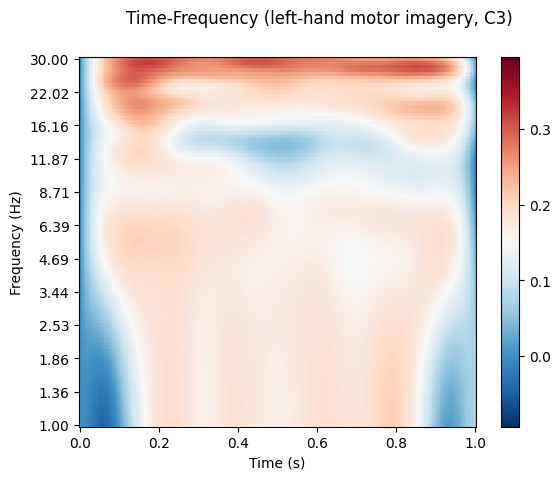

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


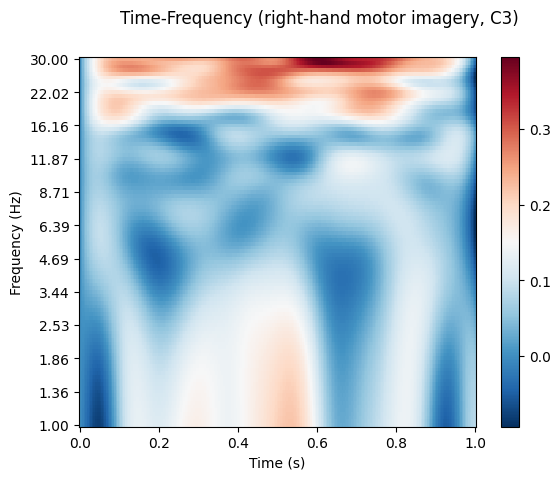

In [18]:

epochs = mne.Epochs(raw_resampled, events=event_arr, event_id=None, tmin=0, tmax=1, baseline=None, preload=True,proj=False)

# Usage of the function with your data
plot_hand_motor_imagery(
    epochs=epochs,  # your epochs data
    left_epoch_ids=[0],  # or list of specific epoch numbers for left hand
    right_epoch_ids=[1],  # or list of specific epoch numbers for right hand
    channel='C3',
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)

Not setting metadata
1272 matching events found
No baseline correction applied
Using data from preloaded Raw for 1272 events and 401 original time points ...
0 bad epochs dropped
Not setting metadata
950 matching events found
No baseline correction applied
Not setting metadata
159 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


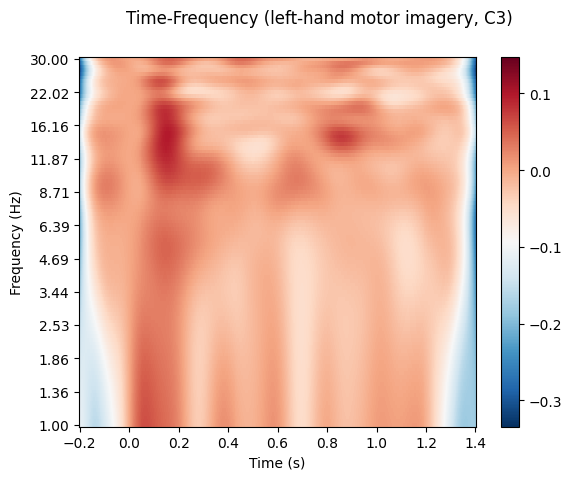

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


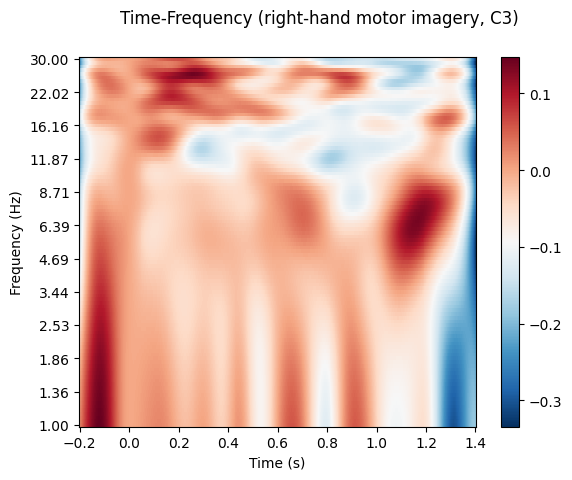

Not setting metadata
950 matching events found
No baseline correction applied
Not setting metadata
159 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


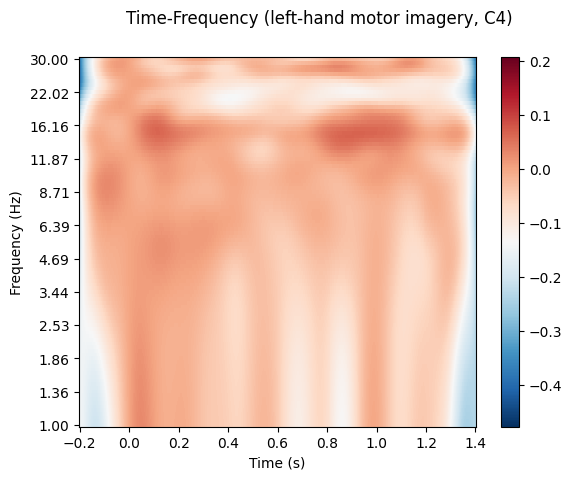

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


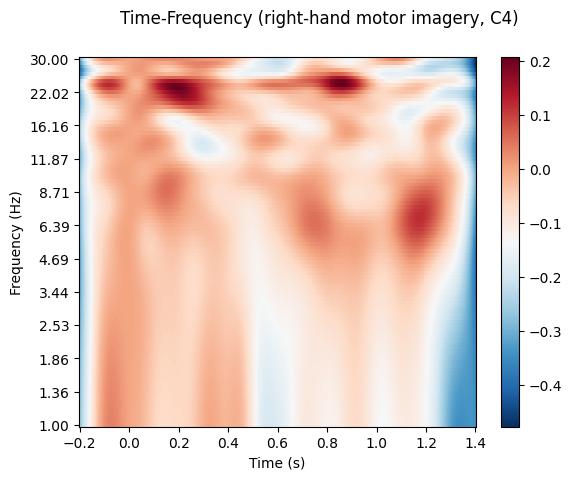

In [24]:

epochs = mne.Epochs(afterica, events=event_arr, event_id=None, tmin=-0.2, tmax=1.4, baseline=None, preload=True,proj=False)

# Usage of the function with your data
plot_hand_motor_imagery(
    epochs=epochs,  # your epochs data
    left_epoch_ids=[0],  # or list of specific epoch numbers for left hand
    right_epoch_ids=[2],  # or list of specific epoch numbers for right hand
    channel='C3',
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)


# Usage of the function with your data
plot_hand_motor_imagery(
    epochs=epochs,  # your epochs data
    left_epoch_ids=[0],  # or list of specific epoch numbers for left hand
    right_epoch_ids=[2],  # or list of specific epoch numbers for right hand
    channel='C4',
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)

Not setting metadata
163 matching events found
No baseline correction applied
Not setting metadata
159 matching events found
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


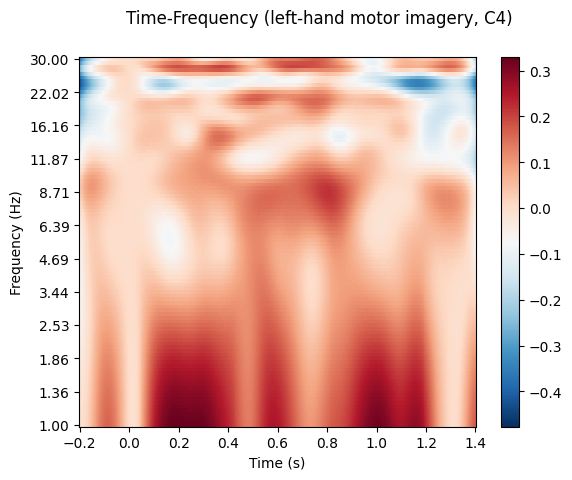

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


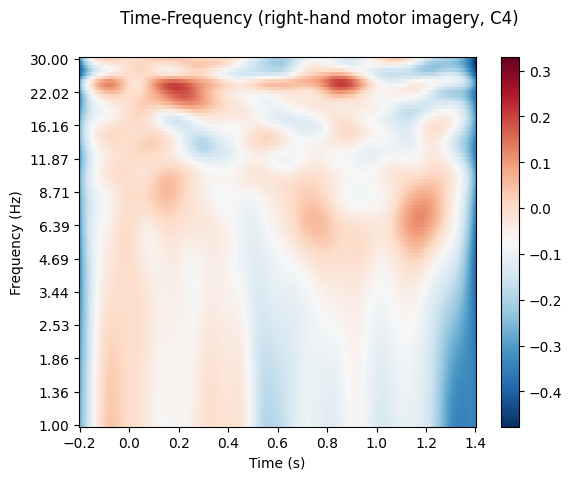

In [25]:

#
plot_hand_motor_imagery(
    epochs=epochs,  # your epochs data
    left_epoch_ids=[1],  # or list of specific epoch numbers for left hand
    right_epoch_ids=[2],  # or list of specific epoch numbers for right hand
    channel='C4',
    freqs=np.logspace(*np.log10([1, 30]), num=100),  # frequencies of interest
    n_cycles=np.logspace(*np.log10([1, 30]), num=100) / 2.  # number of cycles for each frequency
)

Not setting metadata
1272 matching events found
No baseline correction applied
Using data from preloaded Raw for 1272 events and 251 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


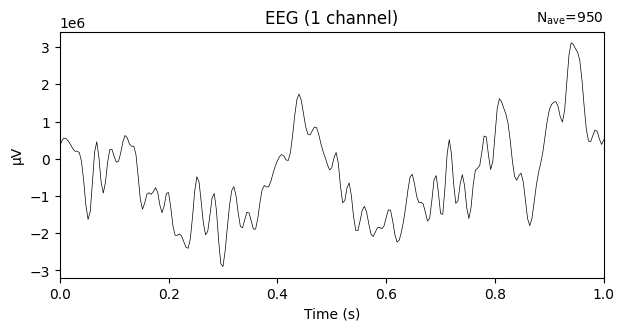

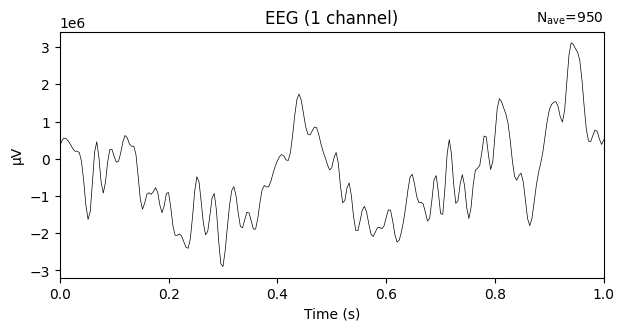

In [117]:
epochs = mne.Epochs(raw_resampled, events=event_arr, event_id=None, tmin=0, tmax=1, baseline=None, preload=True,proj=False)

epochs["0"].average(picks=['C3']).plot()